In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_excel('AW-Bikes_Dataset.xlsx')

In [3]:
dataset.head()

,Gender,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,Age,BikeBuyer
0,0,1,3,0,1,81916,50.97,30,1
1,0,1,2,1,2,81076,53.11,45,1
2,1,0,3,0,0,86387,54.08,32,1
3,0,1,2,1,2,61481,56.93,40,1
4,0,1,1,0,0,51804,55.41,42,1


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del Modelo =", accuracy)

[[1420  639]
 [ 846 1684]]
Precisión del Modelo = 0.6764000871649597


Matriz de Confusión:
[[1420  639]
 [ 846 1684]]


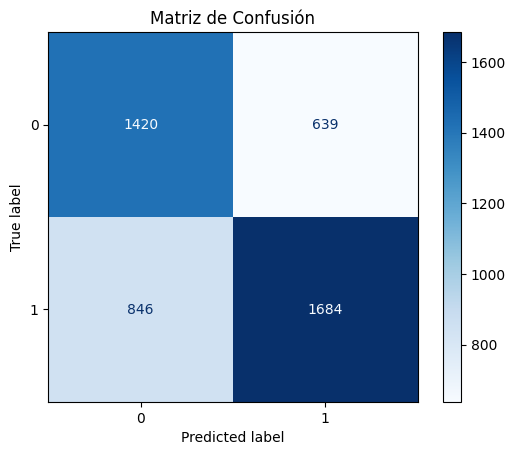

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Matriz de Confusión")
print("Matriz de Confusión:")
print(disp.confusion_matrix)

plt.show()